Average inter-sample interval: 6.721 seconds
Average sampling rate: 0.15 Hz

Unique inter-sample intervals (in seconds):
261901


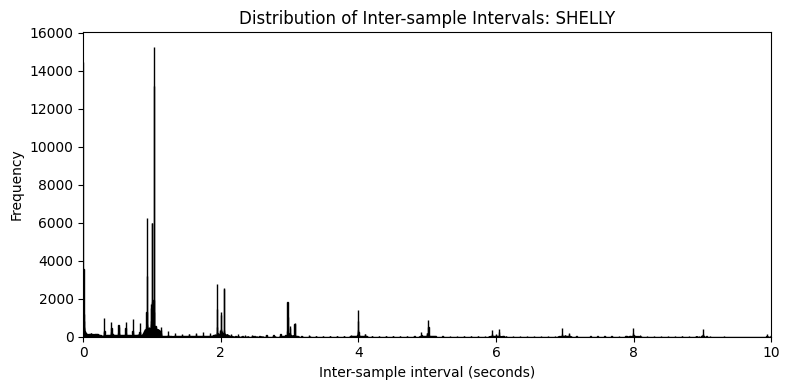

Average inter-sample interval: 2.024 seconds
Average sampling rate: 0.49 Hz

Unique inter-sample intervals (in seconds):
13


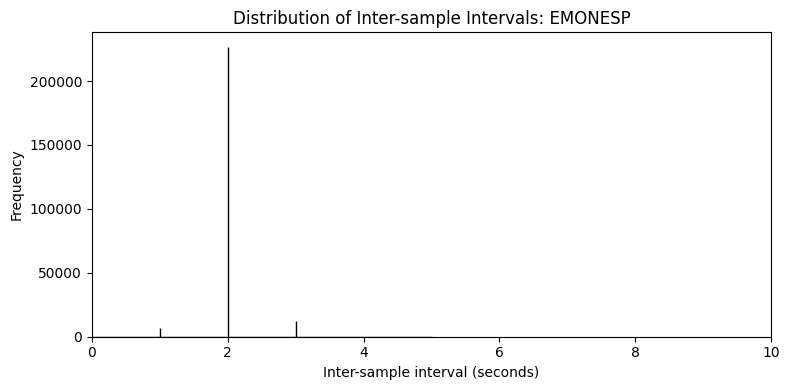

In [2]:
import pandas as pd
import os, sys
import matplotlib.pyplot as plt

dataset_root = r'C:\Users\brind\OneDrive - Universitetet i Oslo\Codes\Alva\datasets\ola'
shelly_path = os.path.join(dataset_root, 'shelly_data.h5')
emonesp_path = os.path.join(dataset_root, 'emonesp_data.h5')
string = ['SHELLY','EMONESP']


for i, path in enumerate([shelly_path, emonesp_path]):

    df = pd.read_hdf(path, key="power")

    # If index is raw Unix timestamps (float), convert to datetime
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, unit="s")

    # Ensure index is sorted
    df = df.sort_index()

    # Compute inter-sample intervals (in seconds)
    intervals = df.index.to_series().diff().dropna().dt.total_seconds()

    # Compute stats
    avg_interval = intervals.mean()
    sampling_rate_hz = 1 / avg_interval if avg_interval else float("inf")

    # Print results
    print(f"Average inter-sample interval: {avg_interval:.3f} seconds")
    print(f"Average sampling rate: {sampling_rate_hz:.2f} Hz")

    unique_intervals = sorted(intervals.unique())
    print("\nUnique inter-sample intervals (in seconds):")
    print(len(unique_intervals))
    # for val in unique_intervals:
    #     print(f"{val:.6f}")

    intervals = intervals[intervals <= 10]
    # Plot histogram of inter-sample intervals
    plt.figure(figsize=(8, 4))
    plt.hist(intervals, bins=5000, edgecolor='black')
    plt.xlabel("Inter-sample interval (seconds)")
    plt.ylabel("Frequency")
    plt.xlim(0,10)
    plt.title(f"Distribution of Inter-sample Intervals: {string[i]}")
    # plt.grid(True)
    plt.tight_layout()
    plt.show()

